In [ ]:
! pip install --upgrade pandasai

In [12]:
! export PANDABI_API_KEY='YOUR_PANDABI_API_KEY' # Get your API key from https://app.pandabi.ai

In [ ]:
! echo $PANDABI_API_KEY

In [2]:
! source ~/.bash_profile

In [3]:
import os
import pandasai as pai
PANDABI_API_KEY = os.getenv('PANDABI_API_KEY')
pai.api_key.set(PANDABI_API_KEY)

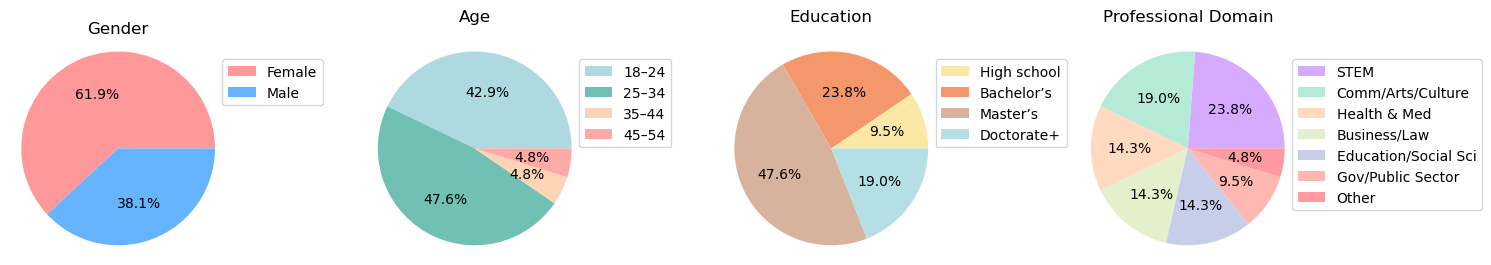

In [102]:
import matplotlib.pyplot as plt
# Plot all four demographics as pie charts
fig, axes = plt.subplots(1, 4, figsize=(15,3))
# fig.suptitle('Participant Demographics - Study 2', fontsize=16, weight='bold')

bbox_to_anchor = (0.95, 0.95)
pad = 15
# 1. Gender
axes[0].pie([61.9, 38.1], labels=None, autopct='%1.1f%%', startangle=0, colors=['#FF9999','#66B3FF'])
axes[0].axis('equal')
axes[0].set_title('Gender')
axes[0].legend(['Female', 'Male'],loc='upper left', bbox_to_anchor=bbox_to_anchor)  

# 2. Age
axes[1].pie([42.9, 47.6, 4.8, 4.8], labels=None, autopct='%1.1f%%', startangle=0, colors=['#AED9E0', '#70C1B3', '#FFD3B5', '#FFAAA6'])
axes[1].axis('equal')
axes[1].set_title('Age', pad=pad)
axes[1].legend(['18–24', '25–34', '35–44', '45–54'], loc='upper left', bbox_to_anchor=bbox_to_anchor)  

# 3. Education
axes[2].pie([9.5, 23.8, 47.6, 19.0], labels=None, autopct='%1.1f%%', startangle=0, colors=['#FBE8A6', '#F4976C', '#D7B29D', '#B4DFE5'])
axes[2].axis('equal')
axes[2].set_title('Education', pad=pad)
axes[2].legend(['High school', 'Bachelor’s', 'Master’s', 'Doctorate+'], loc='upper left', bbox_to_anchor=bbox_to_anchor)  

# 4. Professional Domain
domain_labels = ['STEM', 'Comm/Arts/Culture', 'Health & Med', 'Business/Law','Education/Social Sci', 'Gov/Public Sector', 'Other']

domain_values = [23.8, 19.0, 14.3, 14.3, 14.3, 9.5, 4.8]
domain_colors = ['#D5AAFF', '#B5EAD7', '#FFDAC1', '#E2F0CB', '#C7CEEA', '#FFB7B2', '#FF9AA2']
axes[3].pie(domain_values, labels=None, autopct='%1.1f%%', startangle=0, colors=domain_colors)
axes[3].axis('equal')
axes[3].set_title('Professional Domain', pad=pad)
axes[3].legend(domain_labels, loc='upper left', bbox_to_anchor=bbox_to_anchor)  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Participant_Demographics.png')
# plt.show()


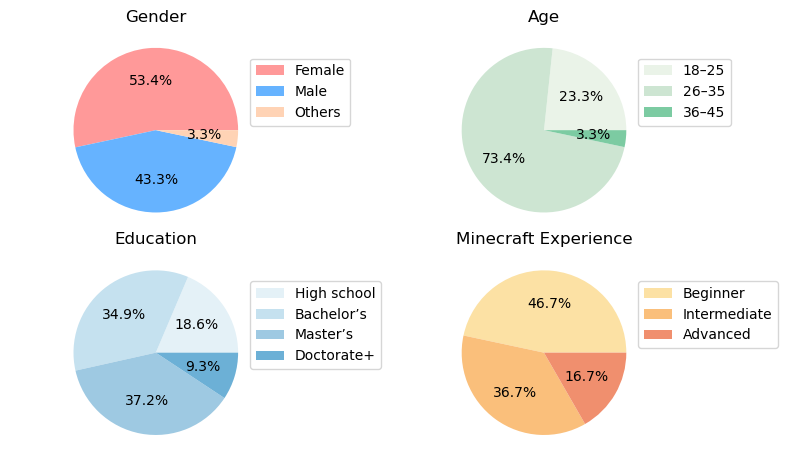

In [148]:
import matplotlib.pyplot as plt
# Plot all four demographics as pie charts
fig, axes = plt.subplots(2, 2, figsize=(8,5))
# fig.suptitle('Participant Demographics - Study 2', fontsize=16, weight='bold')

bbox_to_anchor = (0.8, 0.95)
pad = 15

# 1. Gender
axes[0, 0].pie([53.3, 43.3, 3.3], labels=None, autopct='%1.1f%%', startangle=0, colors=['#FF9999','#66B3FF', '#FFD3B5'])
axes[0, 0].axis('equal')
axes[0, 0].set_title('Gender', pad=pad)
axes[0, 0].legend(['Female', 'Male', 'Others'],loc='upper left', bbox_to_anchor=bbox_to_anchor)  

# 2. Age
axes[0, 1].pie([23.3, 73.3, 3.3], labels=None, autopct='%1.1f%%', startangle=0, colors=['#EAF3E8', '#CDE5D2', '#7CCBA2'])
axes[0, 1].axis('equal')
axes[0, 1].set_title('Age', pad=pad)
axes[0, 1].legend(['18–25', '26–35', '36–45'], loc='upper left', bbox_to_anchor=bbox_to_anchor)  

# 3. Education
axes[1, 0].pie([18.6, 34.9, 37.2, 9.3], labels=None, autopct='%1.1f%%', startangle=0, colors=['#E4F1F7', '#C5E1EF', '#9EC9E2', '#6CB0D6'])
axes[1, 0].axis('equal')
axes[1, 0].set_title('Education', pad=pad)
axes[1, 0].legend(['High school', 'Bachelor’s', 'Master’s', 'Doctorate+'], loc='upper left', bbox_to_anchor=bbox_to_anchor)  

# 4. Minecraft experience
axes[1, 1].pie([46.7, 36.7, 16.7], labels=None, autopct='%1.1f%%', startangle=0, colors=['#FCE1A4', '#FABF7B', '#F08F6E'])
axes[1, 1].axis('equal')
axes[1, 1].set_title('Minecraft Experience', pad=pad)
axes[1, 1].legend(['Beginner', 'Intermediate', 'Advanced'], loc='upper left', bbox_to_anchor=bbox_to_anchor)  

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Participant_Demographics_Minecraft.png')
# plt.show()


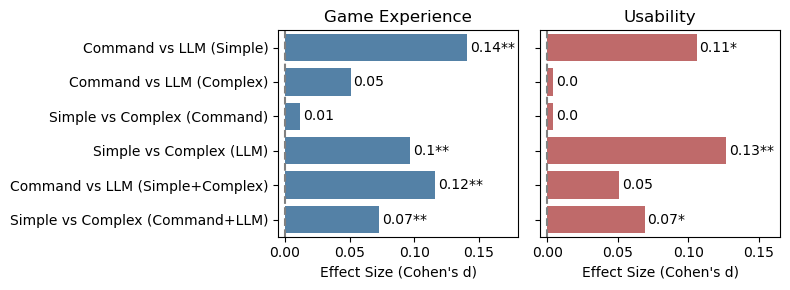

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Data from the tables (mocked with the actual effect sizes and p-values from the user input)
data = {
    'Comparison': [
        'Command vs LLM (Simple)',
        'Command vs LLM (Complex)',
        'Simple vs Complex (Command)',
        'Simple vs Complex (LLM)',
        'Command vs LLM (Simple+Complex)',
        'Simple vs Complex (Command+LLM)'
    ],
    'Game Experience Effect Size': [0.141, 0.051, 0.012, 0.097, 0.116, 0.073],
    'Game Experience P-value': [0.003, 0.078, 0.176, 0.003, 0.009, 0.005],
    'Usability Effect Size': [0.106, 0.004, 0.004, 0.127, 0.051, 0.069],
    'Usability P-value': [0.0132, 0.601, 0.547, 0.000, 0.082, 0.010]
}

df = pd.DataFrame(data)

# Define significance levels
def significance_marker(p):
    if p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# Add significance markers to the effect size labels
df['Game Experience Marker'] = df['Game Experience P-value'].apply(significance_marker)
df['Usability Marker'] = df['Usability P-value'].apply(significance_marker)

# Combine effect size and marker for display
df['Game Experience Label'] = df['Game Experience Effect Size'].round(2).astype(str) + df['Game Experience Marker']
df['Usability Label'] = df['Usability Effect Size'].round(2).astype(str) + df['Usability Marker']



# Define significance levels
def significance_marker(p):
    if p < 0.01:
        return '**'
    elif p < 0.05:
        return '*'
    else:
        return ''

# Add significance markers to the effect size labels
df['Game Experience Marker'] = df['Game Experience P-value'].apply(significance_marker)
df['Usability Marker'] = df['Usability P-value'].apply(significance_marker)

# Combine effect size and marker for display
df['Game Experience Label'] = df['Game Experience Effect Size'].round(2).astype(str) + df['Game Experience Marker']
df['Usability Label'] = df['Usability Effect Size'].round(2).astype(str) + df['Usability Marker']

# Plotting again with labels
fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)

# Plot for Game Experience
sns.barplot(y='Comparison', x='Game Experience Effect Size', data=df, ax=axes[0], color='steelblue')
for i, (val, label) in enumerate(zip(df['Game Experience Effect Size'], df['Game Experience Label'])):
    axes[0].text(val + 0.002 if val >= 0 else val - 0.002, i, label, va='center', ha='left' if val >= 0 else 'right')

axes[0].set_title('Game Experience')
axes[0].axvline(0, color='gray', linestyle='--')
axes[0].set_xlabel('Effect Size (Cohen\'s d)')
axes[0].set_ylabel('')
axes[0].set_xlim(-0.005, 0.18)

# Plot for Usability
sns.barplot(y='Comparison', x='Usability Effect Size', data=df, ax=axes[1], color='indianred')
for i, (val, label) in enumerate(zip(df['Usability Effect Size'], df['Usability Label'])):
    axes[1].text(val + 0.002 if val >= 0 else val - 0.002, i, label, va='center', ha='left' if val >= 0 else 'right')

axes[1].set_title('Usability')
axes[1].axvline(0, color='gray', linestyle='--')
axes[1].set_xlabel('Effect Size (Cohen\'s d)')
axes[1].set_ylabel('')
axes[1].set_xlim(-0.005, 0.165)

plt.tight_layout()
plt.savefig('ANOVA_EffectSize_P.png')
# plt.suptitle('Effect Sizes from Post-Hoc ANOVA Comparisons (* $p$ < 0.05, ** $p$ < 0.01)', fontsize=14, y=1.05)
plt.show()
